2.0.0-alpha0
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 5s 99us/sample - loss: 14.2846 - accuracy: 0.1135 - val_loss: 14.4031 - val_accuracy: 0.1064
Epoch 2/50
50000/50000 [==============================] - 5s 94us/sample - loss: 14.2877 - accuracy: 0.1136 - val_loss: 14.4031 - val_accuracy: 0.1064
Epoch 3/50
50000/50000 [==============================] - 5s 94us/sample - loss: 14.2877 - accuracy: 0.1136 - val_loss: 14.4031 - val_accuracy: 0.1064
Epoch 4/50
50000/50000 [==============================] - 5s 93us/sample - loss: 14.2877 - accuracy: 0.1136 - val_loss: 14.4031 - val_accuracy: 0.1064
Epoch 5/50
50000/50000 [==============================] - 5s 93us/sample - loss: 14.2877 - accuracy: 0.1136 - val_loss: 14.4031 - val_accuracy: 0.1064
Epoch 6/50
50000/50000 [==============================] - 5s 93us/sample - loss: 14.2877 - accuracy: 0.1136 - val_loss: 14.4031 - val_accuracy: 0.1064
Epoch 7/50
50000/50000 [=======

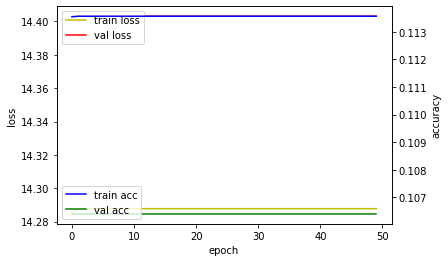

In [5]:
import tensorflow as tf
print(tf.__version__)
import tensorflow.keras.utils as utils
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
import numpy as np

#6만개의 훈련데이터와 1만개의 테스트데이터를 구글에서 가져온다
width = 28
height = 28
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train=x_train.reshape(60000, width*height).astype('float32')/255.0  # 28*28 정사각형 데이터를 1줄짜리 데이터로 바꾼다
x_test = x_test.reshape(10000, width*height).astype('float32')/255.0  # 정규화하기 위해 255로 나눈다

#6만개의 데이터 중
#5만개의 데이터를 훈련용 데이터로 쓰고
#1만개를 검증용 데이터로 쓴다
x_val = x_train[50000:]
y_val = y_train[50000:]
x_train = x_train[:50000]
y_train = y_train[:50000]

#정답을 카테고리화 한다
y_train = utils.to_categorical(y_train)
y_val = utils.to_categorical(y_val)
y_test = utils.to_categorical(y_test)

#입력은 28*28개의 픽셀데이터 
#출력은 0~9까지 10개
#딥러닝 레이어
model = Sequential()
model.add(Dense(units=300, input_dim=width*height, activation='elu'))
model.add(Dense(units=300, activation='softmax'))
model.add(Dense(units=50, activation = 'elu'))
model.add(Dense(units=300, activation = 'softmax'))
model.add(Dense(units=10, activation = 'elu'))
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

#딥러닝 실행
hist = model.fit(x_train, y_train, epochs=50, batch_size=30, verbose=1, validation_data=(x_val, y_val))

#결과 출력
#모델 학습 과정 표시하기
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()